# Realizamos la importacion del archivo Parquet

In [40]:
import pandas as pd

In [41]:
df_propiedades = pd.read_parquet('./train.parquet')

# Realizamos exploracion de los datos

In [42]:
df_propiedades.head(2)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.225,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.780,co


In [43]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [44]:
df_propiedades.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


### Despues de un analisis exploratorio inicial procedemos a borar las columnas, url, region_url, image_url ya que estas urls no brindan informacion relevante para el modelo

In [45]:
df_propiedades.drop(['url','region_url','image_url'], axis=1, inplace=True)

### Realizamos una segunda exploracion mas detallada

In [46]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   region                   346479 non-null  object 
 2   price                    346479 non-null  int64  
 3   type                     346479 non-null  object 
 4   sqfeet                   346479 non-null  int64  
 5   beds                     346479 non-null  int64  
 6   baths                    346479 non-null  float64
 7   cats_allowed             346479 non-null  int64  
 8   dogs_allowed             346479 non-null  int64  
 9   smoking_allowed          346479 non-null  int64  
 10  wheelchair_access        346479 non-null  int64  
 11  electric_vehicle_charge  346479 non-null  int64  
 12  comes_furnished          346479 non-null  int64  
 13  laundry_options          275308 non-null  object 
 14  park

### Eliminamos columnas redundantes, contamos con region, state, Long y Lat deteminamos eliminar region y state, quedarnos con Long y Lat

In [47]:
df_propiedades.drop(['region','state'], axis=1, inplace=True)

### Realizamos una verificacion de la columna 'description' y notamos que es un tecuento de los atributos de las demas variable

In [48]:
df_propiedades.drop(['description'], axis=1, inplace=True)

### Eleminamos valores duplicados

In [49]:
df_propiedades = df_propiedades.drop_duplicates()

In [50]:
df_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346479 entries, 0 to 346478
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   price                    346479 non-null  int64  
 2   type                     346479 non-null  object 
 3   sqfeet                   346479 non-null  int64  
 4   beds                     346479 non-null  int64  
 5   baths                    346479 non-null  float64
 6   cats_allowed             346479 non-null  int64  
 7   dogs_allowed             346479 non-null  int64  
 8   smoking_allowed          346479 non-null  int64  
 9   wheelchair_access        346479 non-null  int64  
 10  electric_vehicle_charge  346479 non-null  int64  
 11  comes_furnished          346479 non-null  int64  
 12  laundry_options          275308 non-null  object 
 13  parking_options          219797 non-null  object 
 14  lat 

### Realizamos validacion de las propiedades que tiene valores de 0, determinamos que podrian generar sesgo en el modelo y las eliminamos

In [51]:
verificar = df_propiedades.price == 0

In [52]:
df_propiedades[verificar].count()

id                         1175
price                      1175
type                       1175
sqfeet                     1175
beds                       1175
baths                      1175
cats_allowed               1175
dogs_allowed               1175
smoking_allowed            1175
wheelchair_access          1175
electric_vehicle_charge    1175
comes_furnished            1175
laundry_options             996
parking_options             824
lat                        1167
long                       1167
dtype: int64

In [53]:
## Realizamos la eliminacion de los valores 0 de la columna price
df_propiedades.drop(df_propiedades[(df_propiedades['price'] == 0)].index, inplace=True)

### Verificamos variable 'laundry_options' una de la variables con mas nulos, y determinamos 

In [54]:
df_propiedades['laundry_options'].isnull().sum()

70992

In [55]:
df_propiedades['laundry_options'].value_counts()

w/d in unit           118254
w/d hookups            67807
laundry on site        52599
laundry in bldg        32375
no laundry on site      3277
Name: laundry_options, dtype: int64

### Verificamos variable 'parking_options' una de la variables con mas nulos, y determinamos 

In [56]:
df_propiedades['parking_options'].isnull().sum()

126331

In [57]:
df_propiedades['parking_options'].value_counts()

off-street parking    115185
attached garage        36328
carport                34818
detached garage        15266
street parking         14358
no parking              2875
valet parking            143
Name: parking_options, dtype: int64

### Elaboro dos dataset, uno dejando los valores nulos y el otro borardo los valores nulos para verificar un mejor modelo

In [58]:
df_sinull = df_propiedades.dropna()
df_conull = df_propiedades

# Pasamos a realizar las normalizaciones de las variables,\\ 
## Vamos a realizar una funcion para realizar las normalizaciones de los dataset

In [59]:
## Importamos la libreria sklearn para realizar procesos de normalizacion 
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [60]:
def transform(dataset):
    ## importamos libreria para realizar normalizacion
    from sklearn import preprocessing

    ## declaramos la variable LabelEncoder para realizar las transformaciones
    le = preprocessing.LabelEncoder()

    ## Aplicamos las transformaciones a las variables, Type, laundry_options, parking_options
    dataset['type_le'] = le.fit_transform(dataset['type'])
    dataset['laundry_options_le'] = le.fit_transform(dataset['laundry_options'])
    dataset['parking_options_le'] = le.fit_transform(dataset['parking_options'])

    ## Eliminamos las columnas de la cuales himos las normalizaciones
    dataset.drop(['id','type','laundry_options','parking_options'], axis=1, inplace=True)

    ##Creamos la nueva columna category_price donde definimos los valores de la variable, solicitados
    ## low = 1
    ## not low = 0
    dataset['category_price'] = [1 if s <= 999 else 0 for s in dataset['price']]

    return dataset
    
    

In [61]:
df_sinull.drop(['lat','long'], axis=1, inplace=True)

C:\Users\crist\AppData\Local\Temp\ipykernel_13656\1202550754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinull.drop(['lat','long'], axis=1, inplace=True)


## Utilizamos nuestra funcion transform para nuestros dataset

In [62]:
df_sinull = transform(df_sinull)
df_conull = transform(df_conull)

C:\Users\crist\AppData\Local\Temp\ipykernel_13656\1393497761.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['type_le'] = le.fit_transform(dataset['type'])
C:\Users\crist\AppData\Local\Temp\ipykernel_13656\1393497761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['laundry_options_le'] = le.fit_transform(dataset['laundry_options'])
C:\Users\crist\AppData\Local\Temp\ipykernel_13656\1393497761.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

### verificamos si nuestra variable objetivo se encuentra balanceada

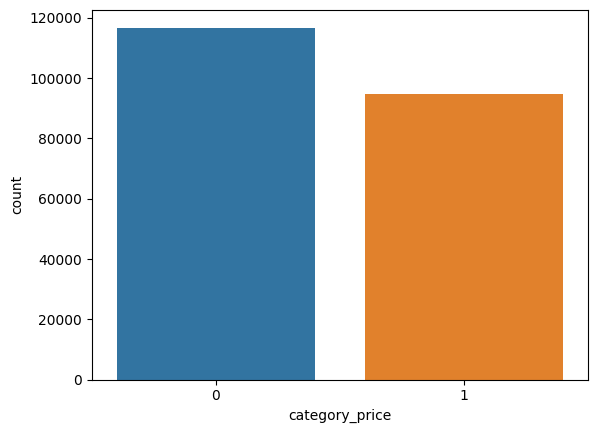

In [63]:
sns.countplot(x='category_price', data=df_sinull) 
plt.show()
## Podemos verificar que nuestra variable objetivo se encuentra balanceada

### vamos a realizar un mapa de correlaciones para mirar las distribuciones de las variables

In [64]:
## Creamos una funcion para realizar correlaciones 
def plot_corre_heatmap(df_corr):
    # Quitamos el triangulo superior para facilitar la lectura
    df_corr = df_corr.corr()
    matrix = np.tril(np.ones(df_corr.shape)).astype(np.bool_)
    df_corr = df_corr.where(matrix)

    # Utilizamos el heatmap de seaborn para visualizar
    sns.heatmap(df_corr, cmap=sns.diverging_palette(90, 20, as_cmap=True),
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values)

### graficamos el dataset sin nulos

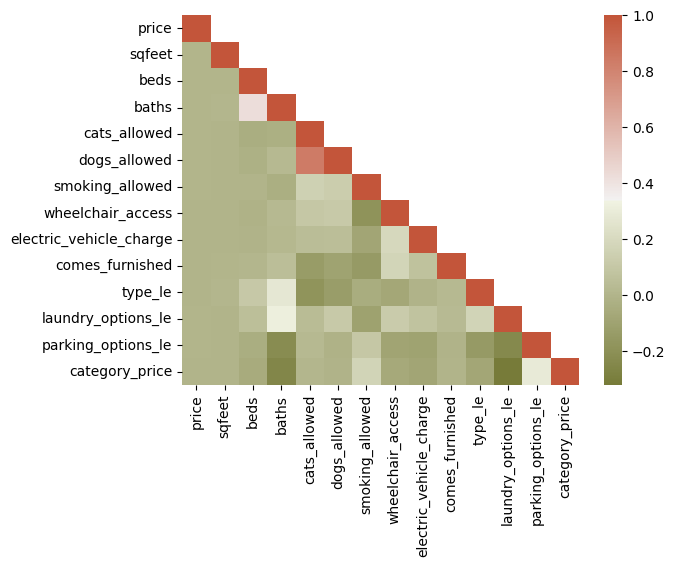

In [65]:
plot_corre_heatmap(df_sinull)

### Hacemos un nuevo dataset con las variable que tienen correlacion

In [89]:
df_corr_sinull = df_sinull[['sqfeet','beds','baths','smoking_allowed','wheelchair_access','type_le','laundry_options_le',
       'parking_options_le','category_price']]

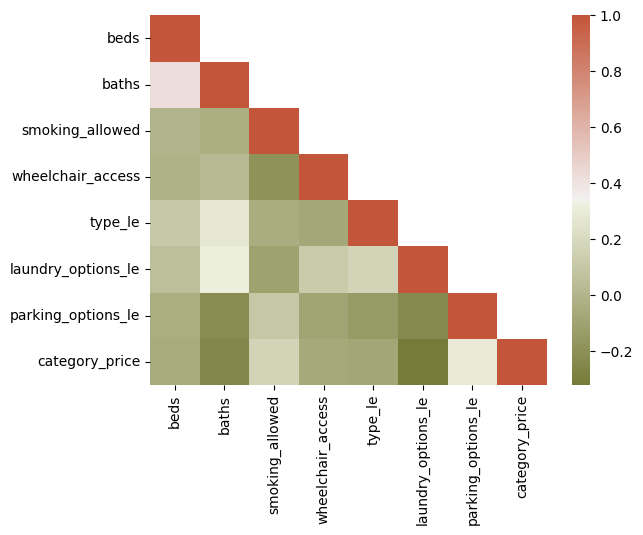

In [67]:
## graficamos una ves mas para mirar un poco mas al detalle
plot_corre_heatmap(df_corr_sinull)

### instanciamos nuestras variables X, y para iniciar con el entrenamiento

In [92]:
X = df_corr_sinull[['sqfeet','beds','baths','smoking_allowed','wheelchair_access','type_le','laundry_options_le',
       'parking_options_le']]
y = df_corr_sinull['category_price']

#### Hacemos validacion cruzada, con modelo Arboles de decicion 

In [69]:
## importamos nuestra libreria para el modelo arboles de decicion
from sklearn.tree import DecisionTreeClassifier
## Importamos libreria para validacion cruzada 
from sklearn.model_selection import cross_val_score
## Instanciamos nuestra libreria
arbol = DecisionTreeClassifier()
## Realizamos nuestra validacion 
arbol_puntaje = cross_val_score(arbol, X, y, cv=5)
## Miramos las puntuaciones
print(arbol_puntaje)

[0.748221   0.74621149 0.74647155 0.74580959 0.74273015]


### Ahora lo miramos con k-vecinos

In [70]:
## Importamos nuestro modelo
from sklearn.neighbors import KNeighborsClassifier
## Instanciamos nuestro modelo k-vecinos
knn = KNeighborsClassifier(n_neighbors=1)
##Realizamos validacion cruzada
knn_puntaje = cross_val_score(knn, X, y, cv=5)
## miramos nuestros puntajes
print(knn_puntaje)

[0.66680063 0.63479042 0.65630393 0.68337313 0.66253724]


### lo intentamos con cross_validate

In [71]:
from sklearn.model_selection import cross_validate
arbol2_puntaje = cross_validate(arbol, X, y, cv=5, scoring = ['precision','recall'])
knn_puntaje = cross_validate(knn, X, y, cv=5, scoring = ['precision','recall'])
print(arbol2_puntaje)
print(knn_puntaje)

{'fit_time': array([0.61917996, 0.62191892, 0.49799061, 0.38177323, 0.44590163]), 'score_time': array([0.10592818, 0.1017983 , 0.09932113, 0.08608747, 0.10082006]), 'test_precision': array([0.72241305, 0.72041913, 0.7223425 , 0.72042432, 0.71510169]), 'test_recall': array([0.71070278, 0.70790432, 0.70464625, 0.7063886 , 0.70732351])}
{'fit_time': array([1.23784995, 1.23929453, 1.18873405, 1.5675714 , 1.26335096]), 'score_time': array([25.27447605, 23.46458673, 24.31025171, 24.96132159, 27.2411871 ]), 'test_precision': array([0.59872845, 0.58414887, 0.60061254, 0.63470785, 0.6165842 ]), 'test_recall': array([0.77570093, 0.63979091, 0.693717  , 0.68996832, 0.65135435])}


### Voy hacer mi entrenamiento y voy a utilizar hiperparametros

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60, stratify=y)

In [74]:
from sklearn.model_selection import GridSearchCV
from IPython.display import clear_output
param_grid = {'n_neighbors':np.arange(16, 24),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree']}

model = GridSearchCV(knn, param_grid=param_grid, cv=5)
clear_output(wait=True)
# Entrenamos
model.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5],
                         'n_neighbors': array([16, 17, 18, 19, 20, 21, 22, 23]),
                         'weights': ['uniform', 'distance']})

In [75]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 3, 'n_neighbors': 23, 'weights': 'distance'}
Mejor Score: 0.7376000540376236



In [94]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(algorithm='auto', leaf_size= 3, n_neighbors =23, weights='distance')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60, stratify=y)

# Se entrena el modelo
knn.fit(X_train, y_train)

# Predicciones
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Desempeño del modelo en train, calculando la precisión (accuracy)
knn_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del modelo en test, calculando la precisión (accuracy)
knn_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del modelo para el Training set: ',knn_train_accuracy)
print('Desempeño del modelo para el Test set: ',knn_test_accuracy)

Desempeño del modelo para el Training set:  0.9112499577831065
Desempeño del modelo para el Test set:  0.8471213100285269


In [95]:
df_test = pd.read_parquet('./test.parquet')

In [96]:
def data_test(df_test):
    df_test.drop(['url','region_url','image_url'], axis=1, inplace=True)
    df_test.drop(['region','state'], axis=1, inplace=True)
    df_test.drop(['description'], axis=1, inplace=True)
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    df_test['type_le'] = le.fit_transform(df_test['type'])
    df_test['laundry_options_le'] = le.fit_transform(df_test['laundry_options'])
    df_test['parking_options_le'] = le.fit_transform(df_test['parking_options'])
    df_test.drop(['id','type','laundry_options','parking_options'], axis=1, inplace=True)
    df_test.drop(['lat','long'], axis=1, inplace=True)
    df_test = df_test[['sqfeet','beds','baths','smoking_allowed','wheelchair_access','type_le','laundry_options_le',
       'parking_options_le']]
    
    return df_test

In [97]:
df_test = data_test(df_test)
test_pred = knn.predict(df_test)
pred_csv = pd.DataFrame(test_pred)
pred_csv.to_csv('C:\\Users\\crist\\OneDrive\\Desktop\\Carolina\\Alemax019.csv',index=False)